# Predicting Available Days
## Exploratory Data Analysis 

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,accuracy_score


In [2]:
# Load the CSV File as Pandas DF
df = pd.read_csv('../../data/interim/clean_airbnb_day3.csv')
df.head()

,listing_name,description,bed_type,listing_link,nightly_price,total_price,available_date,rating,nb_reviews,start_date,end_date,Day_1,Day_2,Day_3,Day_4,Day_5
0,Boutique hotel in Ottawa,Sonder Rideau | Superior One-Bedroom Apartment,2 beds,www.airbnb.ca/rooms/766090900734631497?adults=...,235,"1,176",2023-08-21 - 2023-08-26,4.83,541.0,2023-08-21,2023-08-26,1,1,1,1,1
1,Room in Ottawa,Cozy room in a townhouse.,Stay with Williams,www.airbnb.ca/rooms/655257326563847673?adults=...,93,649,2023-08-21 - 2023-08-28,5.00,8.0,2023-08-21,2023-08-28,1,1,1,1,1
2,Condo in Gatineau,Beautiful accommodation only 19 km from Ottawa,1 bed,www.airbnb.ca/rooms/51229832?adults=1&children...,119,835,2023-09-04 - 2023-09-11,4.80,181.0,2023-09-04,2023-09-11,0,0,0,0,0
3,Room in Ottawa,A Bright Basement Unit with Specious Bedroom,Stay with Erica,www.airbnb.ca/rooms/52091638?adults=1&category...,130,649,2023-08-25 - 2023-08-30,4.91,148.0,2023-08-25,2023-08-30,0,0,0,0,1
4,Room in Ottawa,⭐Cozy and Simple bedroom 5mins walk to uO,Stay with Sunnie,www.airbnb.ca/rooms/53130496?adults=1&category...,106,634,2023-09-04 - 2023-09-10,4.59,171.0,2023-09-04,2023-09-10,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_name    252 non-null    object 
 1   description     252 non-null    object 
 2   bed_type        252 non-null    object 
 3   listing_link    252 non-null    object 
 4   nightly_price   252 non-null    int64  
 5   total_price     252 non-null    object 
 6   available_date  252 non-null    object 
 7   rating          238 non-null    float64
 8   nb_reviews      238 non-null    float64
 9   start_date      252 non-null    object 
 10  end_date        252 non-null    object 
 11  Day_1           252 non-null    int64  
 12  Day_2           252 non-null    int64  
 13  Day_3           252 non-null    int64  
 14  Day_4           252 non-null    int64  
 15  Day_5           252 non-null    int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 31.6+ KB


In [4]:
#  Are there any null values?
df.isna().sum()

listing_name       0
description        0
bed_type           0
listing_link       0
nightly_price      0
total_price        0
available_date     0
rating            14
nb_reviews        14
start_date         0
end_date           0
Day_1              0
Day_2              0
Day_3              0
Day_4              0
Day_5              0
dtype: int64

In [5]:
# Drop null values
df.dropna(inplace=True)

## Data distribution
### Day 1 (Next Day)

In [6]:
# What is the distribution of avaialble vs not available for Day1
df.groupby("Day_1").size()

Day_1
0    182
1     56
dtype: int64

### Day 2

In [7]:
# What is the distribution of avaialble vs not available for Day1
df.groupby("Day_2").size()

Day_2
0    182
1     56
dtype: int64

### Day 3

In [8]:
# What is the distribution of avaialble vs not available for Day1
df.groupby("Day_3").size()

Day_3
0    182
1     56
dtype: int64

### Day 4

In [9]:
# What is the distribution of avaialble vs not available for Day1
df.groupby("Day_4").size()

Day_4
0    182
1     56
dtype: int64

### Day 5

In [10]:
# What is the distribution of avaialble vs not available for Day1
df.groupby("Day_5").size()

Day_5
0    168
1     70
dtype: int64

One can notice that the data is highly unbalanced as we have way more unavailable dates than available ones. 

### Bed Type

In [11]:
df['bed_type'].unique()

array(['2 beds', 'Stay with Williams', '1 bed', 'Stay with Erica',
       'Stay with Sunnie', '1 queen bed', '4 beds', '3 queen beds',
       '11 beds', '2 queen beds'], dtype=object)

In [12]:
perc_double_bed = df["bed_type"].value_counts()["1 double bed"]/ df.bed_type.count() *100
perc_2_beds = df["bed_type"].value_counts()["2 beds"] / df.bed_type.count() *100
perc_3_beds = df["bed_type"].value_counts()["3 beds"] / df.bed_type.count() *100
perc_4_beds = df["bed_type"].value_counts()["4 beds"] / df.bed_type.count() *100
perc_5_beds = df["bed_type"].value_counts()["5 beds"] / df.bed_type.count() *100
perc_8_beds = df["bed_type"].value_counts()["8 beds"] / df.bed_type.count() *100
perc_3_queen_beds = df["bed_type"].value_counts()["3 queen beds"] / df.bed_type.count() *100
perc_stay_with_am = df["bed_type"].value_counts()["Stay with Amanda"] / df.bed_type.count() *100

print(f"{round(perc_double_bed,2)}% of listing have 1 double bed")
print(f"{round(perc_2_beds,2)}% of listing have 2 beds")
print(f"{round(perc_3_beds,2)}% of listing have 3 beds")
print(f"{round(perc_4_beds,2)}% of listing have 4 beds")
print(f"{round(perc_5_beds,2)}% of listing have 5 beds")
print(f"{round(perc_8_beds,2)}% of listing have 8 beds")
print(f"{round(perc_3_queen_beds,2)}% of listing have 3 queen beds")
print(f"{round(perc_stay_with_am,2)}% of listing stay with others")



KeyError: '1 double bed'

In [ ]:
mapping = {
    "1 double bed": 1,
    "2 beds": 2,
    "3 beds": 3,
    "4 beds": 4,
    "5 beds": 5,
    "6 beds": 6,
    "7 beds": 7,
    "8 beds": 8,
    "3 queen beds": 9
}

# Assign number 10 to all other options 
df["bed_type"] = df["bed_type"].map(lambda x: mapping.get(x, 10))
df.head()

In [ ]:
df['bed_type'].unique()

### Listing Name 

In [ ]:
df['listing_name'].unique()

In [ ]:
mapping_listings = {
    'Home in Ottawa': 1,
    'Villa in Ottawa': 1,
    'Townhouse in Ottawa': 1,
    'Boutique hotel in Ottawa': 1,
    'Tiny homes in Clarence-Rockland': 2,
    'Cottage in Ottawa': 1,
    'Room in Ottawa': 1,
    'Cabin in Clarence-Rockland': 2, 
    'Tiny homes in Val-des-Monts':2, 
    'Home in Wakefield':2,
    'Place to stay in Ottawa':1, 
    'Dome in Clarence-Rockland':2,
    'Tiny homes in Mississippi Mills':2
}

# Assign number 10 to all other options 
df["listing_name"] = df["listing_name"].map(lambda x: mapping_listings.get(x, 3))
df.head()


### Total Price

In [ ]:
df['total_price'] = df['total_price'].str.replace(',', '').astype(int)

In [ ]:
df.describe()

In [ ]:
df.info()

## Separate the Features (X) from the Target (y)

In [13]:
# Set the y variable to  "Day_1" column.
y = df["Day_1"]

In [14]:
# Drop Day_1 and set the X to the remaining days.
X = df.drop(['Day_1', 'Day_2','Day_3','Day_4','Day_5', 'description', 'listing_link', 'available_date','start_date', 'end_date'], axis=1)
X.head()


,listing_name,bed_type,nightly_price,total_price,rating,nb_reviews
0,Boutique hotel in Ottawa,2 beds,235,"1,176",4.83,541.0
1,Room in Ottawa,Stay with Williams,93,649,5.00,8.0
2,Condo in Gatineau,1 bed,119,835,4.80,181.0
3,Room in Ottawa,Stay with Erica,130,649,4.91,148.0
4,Room in Ottawa,Stay with Sunnie,106,634,4.59,171.0


### Check null values 

In [15]:
df.isnull().sum()

listing_name      0
description       0
bed_type          0
listing_link      0
nightly_price     0
total_price       0
available_date    0
rating            0
nb_reviews        0
start_date        0
end_date          0
Day_1             0
Day_2             0
Day_3             0
Day_4             0
Day_5             0
dtype: int64

### Drop null values

In [16]:
df = df.dropna()

<AxesSubplot:>

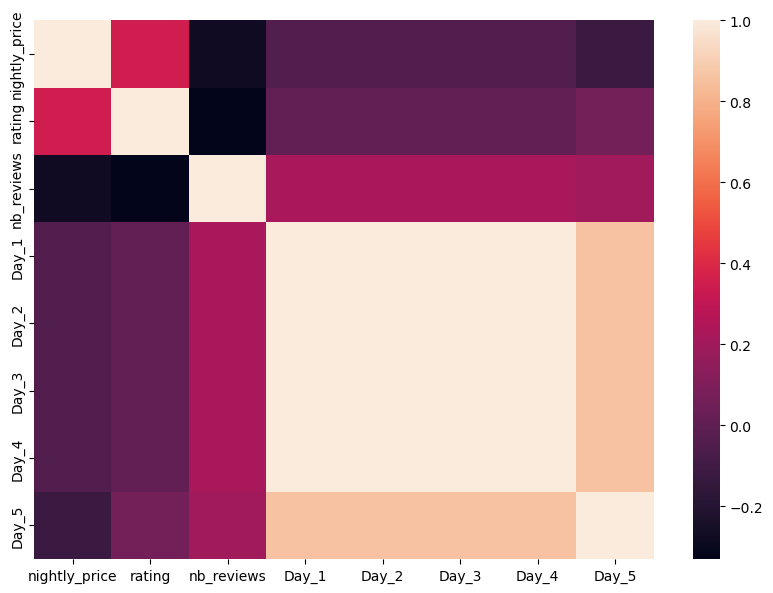

In [17]:
corr = df.corr()

plt.figure(figsize=(10,7))

# Plot the heatmap
sns.heatmap(corr)

## Split our data into training and testing data

In [18]:
#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=1,
                                                    stratify=y,
                                                    test_size=0.2)

# Remove rows with missing values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

X_train.shape

(190, 6)

In [19]:
X_test.shape

(48, 6)

### Scale the data

In [20]:
# Scale training and testing Data 
# Creating a StandardScaler instance.
scaler = StandardScaler()

# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: 'Home in Ottawa'

# Model 1: Logistic Regression Model

## Create a logistic regression model

In [ ]:
#classifier = LogisticRegression(max_iter=10000)
classifier = LogisticRegression(solver='lbfgs', 
                                max_iter=200,
                                random_state=1)
classifier

## Fit (train) or model using the training data

In [ ]:
# Fit the model
classifier.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the model
y_pred = classifier.predict(X_test)
print(f" Logistic Regression Model Accuracy: {accuracy_score(y_test,y_pred):.3f}")

## Validate the model

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

## Make predictions

In [ ]:
# Predict outcomes for test data set
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)


## Evaluate the model 
### Create a confusion matrix

In [ ]:
# Create a confusion matrix and print out the confusion matrix for the predicted outcome.
y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

In [ ]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

In [ ]:
# Create a flattened one-dimensional array of tn, fp, fn, tp with ravel()
tn, fp, fn, tp = cm.ravel()

In [ ]:
tn, fp, fn, tp

In [ ]:
# Calculate the precision of the model based on the confusion matrix
precision = tp / (tp + fp)
precision

In [ ]:
# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)
sensitivity

In [ ]:
f1 = 2*precision*sensitivity / (precision + sensitivity)
f1

In [ ]:
print(classification_report(y_true, y_pred, zero_division=1))

In [ ]:
accuracy_score(y_test, y_pred)

## Calculate the AUC-ROC score
- The model achieved an accuracy score of 92% in predicting unavailable listings.
- Our concern is in predicting available listings. 
- It's important to note that this indicates that precision and F-score may not be reliable metrics for the classes with no predicted samples. 
- It's essential to consider the overall performance of the model and assess it using other relevant metrics, such as accuracy, recall, or area under the ROC curve (AUC-ROC).

In [ ]:
print('AUC score: ', round(roc_auc_score(y_test, y_pred),2))

An AUC Score of 0.5 indicates that the model's predictive performance is equivalent to random chance. This suggests that the model is not able to discriminate between the two classes (available/not available) and is performing no better than random guessing.

In [ ]:
df.Day_1.value_counts()

# Model 2: Basic Neural Network (NN model)
### Import dependencies

In [ ]:
# imports
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf


### Define the basic neural model

In [ ]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=6))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

### Compile the Sequential model together and customize metrics

In [ ]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train the model

In [ ]:
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

### Evaluate the model using the test data

In [ ]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

In [ ]:
print(classification_report(y_true, y_pred, zero_division=1))

In [ ]:
print('AUC score: ', round(roc_auc_score(y_test, y_pred),2))

# Model 3: XGBoost Model
### Import dependencies

In [ ]:
import xgboost as xgb

### Convert the data into DMatrix format

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

### Define the parameters for XGBoost

In [ ]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3
}

### Train the XGBoost model

In [ ]:
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

### Make predictions on the test set

In [ ]:
y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]


### Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

In [ ]:
print('AUC score: ', round(roc_auc_score(y_test, y_pred),2))